In [1]:
import socket
socket.gethostname()

'test-instance'

In [2]:
import os
import sys
import numpy as np
import nept
import matplotlib.pyplot as plt

# define some testing data file locations
fd = '/home/mattmizumi/data/motT/R042/R042-2013-08-18/' # need function that makes list of all folders
fn_lfp = 'R042-2013-08-18-CSC11a.ncs' # from *keys.m, need loader to make file into dict
fn_vt = 'VT1.nvt'
CONST_conv_fact = [2.9176, 2.3794] # pixels to cm conversion for x, y (also from ExpKeys)

# fix annoying 'display last result only' behavior
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

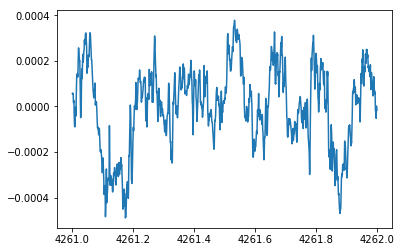

In [3]:
# load and show lfp using nept loaders
lfp = nept.load_lfp(os.path.join(fd,fn_lfp))

start = 4261
stop = 4262
lfpR = lfp.time_slice(start, stop)

#plt.plot(lfp.time, lfp.data)
plt.plot(lfpR.time, lfpR.data)
plt.show()

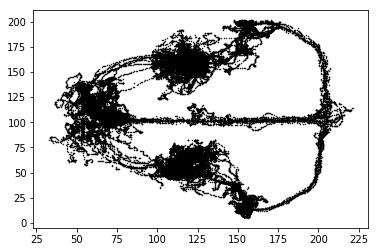

In [4]:
# Load position (.nvt) from this experiment
position = nept.load_position(os.path.join(fd, fn_vt),CONST_conv_fact)

# Plot the position
plt.plot(position.x, position.y, 'k.', ms=1)
plt.show()

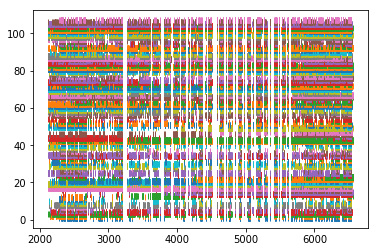

In [5]:
# load spikes
spikes = nept.load_spikes(fd)

# Plot the spikes
for idx, spiketrain in enumerate(spikes):
    plt.plot(spiketrain.time, np.ones(len(spiketrain.time))+idx, '|')
plt.show()

In [6]:
# construct corresponding objects in nelpy
import nelpy as nel

/home/mattmizumi/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.


In [7]:
# lfp should be AnalogSignalArray
lfp_nelpy = nel.AnalogSignalArray(ydata=lfp.data,timestamps=lfp.time,merge_sample_gap=1)
print(lfp_nelpy)

/home/mattmizumi/github/nelpy/nelpy/core/_analogsignalarray.py:201: UserWarning: fs was not specified, so we try to estimate it from the data...
/home/mattmizumi/github/nelpy/nelpy/core/_analogsignalarray.py:203: UserWarning: fs was estimated to be 1999.9999995925464 Hz
/home/mattmizumi/github/nelpy/nelpy/core/_analogsignalarray.py:360: UserWarning: creating support from time and sampling rate, fs!


<AnalogSignalArray at 0x7f986d1cef98: 1 signals (3 segments)> for a total of 1:13:21:408 hours


/home/mattmizumi/github/nelpy/nelpy/utils.py:549: UserWarning: some steps in the data are smaller than the requested step size.


In [8]:
# vt is a 2-D AnalogSignalArray -- note has bigger gaps in data b/c tracking LEDs get obscured
vt_nelpy = np.stack((position.x,position.y),1)
vt_nelpy.shape
vt_nelpy = nel.AnalogSignalArray(ydata=vt_nelpy.T,timestamps=position.time,merge_sample_gap=10)
print(vt_nelpy)

(130363, 2)

/home/mattmizumi/github/nelpy/nelpy/core/_analogsignalarray.py:201: UserWarning: fs was not specified, so we try to estimate it from the data...
/home/mattmizumi/github/nelpy/nelpy/core/_analogsignalarray.py:203: UserWarning: fs was estimated to be 30.241630628448174 Hz


<AnalogSignalArray at 0x7f986d1dc518: 2 signals (3 segments)> for a total of 1:13:21:002 hours


/home/mattmizumi/github/nelpy/nelpy/core/_analogsignalarray.py:360: UserWarning: creating support from time and sampling rate, fs!
/home/mattmizumi/github/nelpy/nelpy/utils.py:549: UserWarning: some steps in the data are smaller than the requested step size.


In [9]:
# load candidates
fn_cand = 'R042-2013-08-18-candidates.mat'
import scipy.io as sio
cand = sio.loadmat(os.path.join(fd,fn_cand))

In [51]:
tstart = cand['evt'][0][0]['tstart']
tend = cand['evt'][0][0]['tend']